In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import random
import pickle

# Get dataset

In [2]:
name = sns.get_dataset_names()[-3]

In [3]:
#Saving the dataset to a variable called 'df' 
df = sns.load_dataset(name)

In [4]:
#Saving the data to the local
#df.to_csv('_data_setup/data.csv',index=False)

# Understanding the data

In [5]:
#sample data
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3672,2019-03-06 17:01:34,2019-03-06 17:14:55,2,1.72,10.0,2.86,0.0,17.16,yellow,credit card,Upper East Side South,Yorkville East,Manhattan,Manhattan
1805,2019-03-18 20:39:17,2019-03-18 20:44:54,1,0.80,5.5,0.00,0.0,9.30,yellow,cash,Clinton East,East Chelsea,Manhattan,Manhattan
6348,2019-03-15 14:14:34,2019-03-15 14:26:41,1,1.80,9.5,0.00,0.0,10.30,green,cash,Crown Heights North,Crown Heights North,Brooklyn,Brooklyn
3699,2019-03-22 16:48:44,2019-03-22 16:55:06,1,0.40,5.5,1.95,0.0,11.75,yellow,credit card,Upper East Side South,Sutton Place/Turtle Bay North,Manhattan,Manhattan
3308,2019-03-18 22:01:16,2019-03-18 22:12:25,1,1.50,8.5,0.00,0.0,12.30,yellow,cash,Midtown North,Times Sq/Theatre District,Manhattan,Manhattan


In [6]:
# # of columns and # of instances
df.shape

(6433, 14)

In [7]:
#Basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [8]:
#Stastical info about the dataframe
df.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [9]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [12]:
df.skew(numeric_only=True)

passengers    2.359143
distance      3.008206
fare          3.217463
tip           2.665152
tolls         5.074936
total         3.093333
dtype: float64

# Data preperation/preprocessing

# Handling null values

In [13]:
from sklearn.impute import KNNImputer

In [14]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [16]:
ct = ColumnTransformer(transformers=[('Ordinal',OrdinalEncoder(),['color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'])],remainder='passthrough')

In [17]:
arr = ct.fit_transform(df)

In [18]:
arr

array([[1.0, 1.0, 99.0, ..., 2.15, 0.0, 12.95],
       [1.0, 0.0, 174.0, ..., 0.0, 0.0, 9.3],
       [1.0, 1.0, 1.0, ..., 2.36, 0.0, 14.16],
       ...,
       [0.0, 0.0, 40.0, ..., 0.0, 0.0, 17.3],
       [0.0, 1.0, 54.0, ..., 0.0, 0.0, 6.8],
       [0.0, 1.0, 14.0, ..., 3.36, 0.0, 20.16]], dtype=object)

In [19]:
ct.get_feature_names_out()

array(['Ordinal__color', 'Ordinal__payment', 'Ordinal__pickup_zone',
       'Ordinal__dropoff_zone', 'Ordinal__pickup_borough',
       'Ordinal__dropoff_borough', 'remainder__pickup',
       'remainder__dropoff', 'remainder__passengers',
       'remainder__distance', 'remainder__fare', 'remainder__tip',
       'remainder__tolls', 'remainder__total'], dtype=object)

In [20]:
arr_temp = arr[:,0:6]

In [21]:
ct.feature_names_in_

array(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip',
       'tolls', 'total', 'color', 'payment', 'pickup_zone',
       'dropoff_zone', 'pickup_borough', 'dropoff_borough'], dtype=object)

In [22]:
arr[0]

array([1.0, 1.0, 99.0, 176.0, 2.0, 2.0, Timestamp('2019-03-23 20:21:09'),
       Timestamp('2019-03-23 20:27:24'), 1, 1.6, 7.0, 2.15, 0.0, 12.95],
      dtype=object)

In [23]:
arr_col = ct.get_feature_names_out()

In [24]:
df = pd.DataFrame(arr,columns=[col.split('__')[-1] for col in arr_col])

In [25]:
df.isna().sum()

color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
dtype: int64

In [26]:
imputer = KNNImputer()

In [27]:
arr = imputer.fit_transform(df.drop(['pickup', 'dropoff'],axis = 1))

In [28]:
df_temp = pd.DataFrame(arr,columns=df.drop(['pickup', 'dropoff'],axis = 1).columns)

In [29]:
df_temp['pickup'] = df['pickup']
df_temp['dropoff'] = df['dropoff']

In [30]:
df = df_temp[['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough']].copy()

In [31]:
df.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [32]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1.0,1.60,7.0,2.15,0.0,12.95,1.0,1.0,99.0,176.0,2.0,2.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1.0,0.79,5.0,0.00,0.0,9.30,1.0,0.0,174.0,182.0,2.0,2.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1.0,1.37,7.5,2.36,0.0,14.16,1.0,1.0,1.0,190.0,2.0,2.0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1.0,7.70,27.0,6.15,0.0,36.95,1.0,1.0,86.0,202.0,2.0,2.0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3.0,2.16,9.0,1.10,0.0,13.40,1.0,1.0,116.0,202.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1.0,0.75,4.5,1.06,0.0,6.36,0.0,1.0,52.0,30.0,2.0,2.0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1.0,18.74,58.0,0.00,0.0,58.80,0.0,1.0,91.0,51.0,3.0,0.0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1.0,4.14,16.0,0.00,0.0,17.30,0.0,0.0,40.0,24.0,1.0,1.0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1.0,1.12,6.0,0.00,0.0,6.80,0.0,1.0,54.0,54.0,1.0,1.0


In [33]:
lc = [ x.split('__')[-1] for x in ct.get_feature_names_out() if 'Ordinal' in x]

In [34]:
df_temp = df[lc]

In [35]:
arr_temp = ct.named_transformers_['Ordinal'].inverse_transform(df_temp)

In [36]:
df[lc] = arr_temp

In [37]:
df.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [38]:
#df.to_csv('_data_setup/processed_data.csv')

In [39]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

# Possible questions to answer

From the given data frame containing details of taxi rides, there are several questions we can answer to gain insights and make informed decisions. Here are some possible questions you can explore:

1. **What is the average number of passengers per ride?**
   This will help you understand the typical occupancy of the taxis.

2. **What is the distribution of fare amounts?**
   Analyzing fare distribution can give you an idea of the pricing structure.

3. **Which payment method is most commonly used?**
   This will help you understand customers' preferred payment options.

4. **What is the average tip amount?**
   This will help you see how much customers are tipping on average.

5. **Which pickup zone has the highest number of rides?**
   This will give you insights into popular pickup locations.

6. **Which dropoff zone is the most common destination?**
   This will help you identify popular dropoff locations.

7. **What are the most common pickup and dropoff boroughs?**
   This will provide information about the most frequently visited areas.

8. **Is there a correlation between distance and fare amount?**
   Understanding the relationship between distance traveled and fare can be important for pricing strategies.

9. **What is the average toll amount per ride?**
   This can help you estimate additional costs incurred due to tolls.

10. **What are the peak hours for taxi rides?**
    Analyzing the demand pattern over different hours can help you optimize taxi availability.

11. **How does the total cost vary based on the color of the taxi?**
    This can help you identify if certain taxi colors have different pricing structures.

12. **What are the top tips given for taxi rides?**
    This can provide insights into customer behavior and satisfaction.

13. **How does the average fare differ across different pickup and dropoff zones?**
    Understanding fare variations across zones can help you target specific areas.

14. **What is the average distance traveled for rides paid with different payment methods?**
    This can help you understand if there are any differences in trip length based on payment type.

15. **Is there any seasonality in taxi ride demand?**
    Analyzing trends over months or seasons can help you plan for peak times.

These questions are just a starting point, and you can come up with many more based on the specific goals and interests you have in mind while working with the data. By exploring the data and answering these questions, you can gain valuable insights to make data-driven decisions and improve taxi services or operations.

In [43]:
#Question one : What is the average number of passengers per ride?
print(f"The average number of passengers per ride : {df['passengers'].sum()/df.shape[0]:0.2f}")

The average number of passengers per ride : 1.54


In [44]:
#Extension to question one
#Question 1.1 : What is the share of rides per day of the week?

In [46]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

In [58]:
df.sort_values(['pickup'],inplace=True)

In [68]:
df.reset_index(inplace=True,drop=True)

In [69]:
#On obsevation, there was a single instance happened in Feburary month. So we will be deleting it from the dataframe

In [71]:
df.drop(['level_0'],axis = 1,inplace = True)

In [73]:
df = df.iloc[1:].copy()

In [76]:
df['day_name'] = df['pickup'].dt.day_name()

In [81]:
df.groupby(['day_name']).count()['pickup']

day_name
Friday       1115
Monday        708
Saturday     1046
Sunday        868
Thursday      904
Tuesday       825
Wednesday     966
Name: pickup, dtype: int64

In [83]:
df.groupby(['day_name']).count()['pickup'].loc['Friday']

1115

In [91]:
def percent_rides_day(day : str):
    total_rides = df.groupby(['day_name']).count()['pickup'].sum()
    rides_on_given_day = df.groupby(['day_name']).count()['pickup'].loc[day]
    return rides_on_given_day/total_rides

In [92]:
day_lst = df['day_name'].value_counts().keys().to_list()

In [94]:
for day in day_lst:
    print(f"The percentage of rides on {day} in March is {percent_rides_day(day)*100 : 0.2f}")

The percentage of rides on Friday in March is  17.34
The percentage of rides on Saturday in March is  16.26
The percentage of rides on Wednesday in March is  15.02
The percentage of rides on Thursday in March is  14.05
The percentage of rides on Sunday in March is  13.50
The percentage of rides on Tuesday in March is  12.83
The percentage of rides on Monday in March is  11.01


In [95]:
#Question two : Distribution of fare

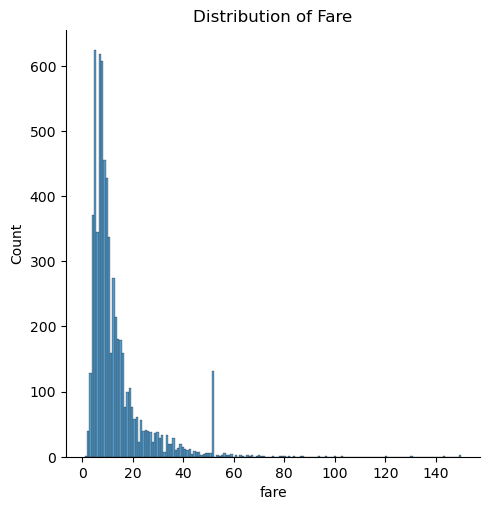

In [110]:
sns.displot(data = df,x = 'fare')
plt.title('Distribution of Fare')
plt.show()

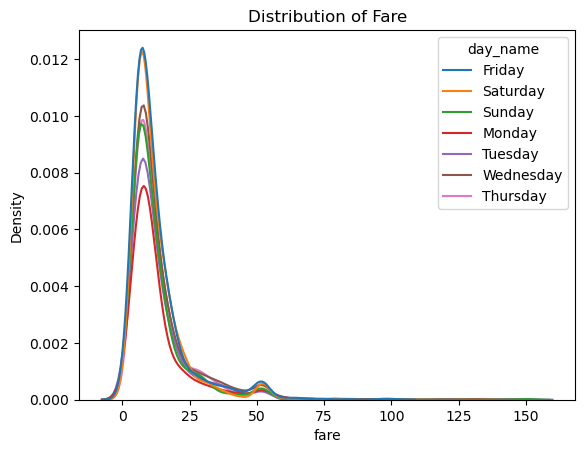

In [112]:
#Extension 2.1 : Distribution of fare as per day
sns.kdeplot(data = df,x = 'fare',hue = 'day_name')
plt.title('Distribution of Fare')
plt.show()

In [98]:
#Question there : Most common payment meathod
df['payment'].value_counts()

credit card    4582
cash           1850
Name: payment, dtype: int64

In [100]:
pastel = sns.color_palette('pastel')

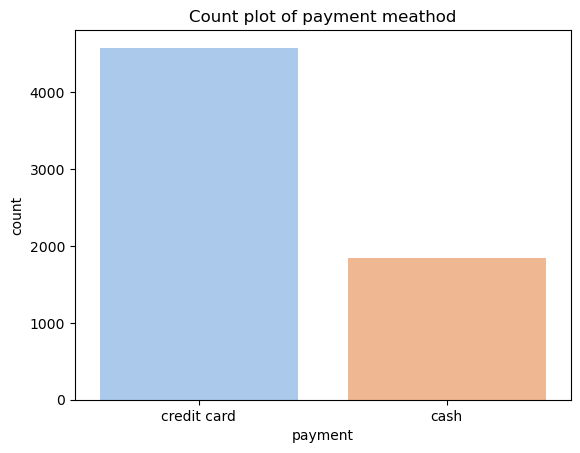

In [113]:
sns.countplot(data = df,x = 'payment',palette=pastel)
plt.title('Count plot of payment meathod')
plt.show()

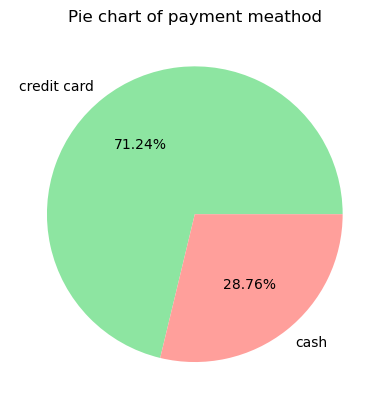

In [114]:
plt.pie(df['payment'].value_counts(),labels=df['payment'].value_counts().keys(),autopct='%0.2f%%',colors=pastel[2:])
plt.title('Pie chart of payment meathod')
plt.show()

In [115]:
#Question four : What is the average tip amount?

In [118]:
print(f"The average tip amount is : {df['tip'].mean():0.2f}")

The average tip amount is : 1.98


In [123]:
df.groupby(['day_name']).mean(numeric_only=True).sort_values(['tip']).tip

day_name
Saturday     1.815143
Sunday       1.908710
Friday       1.980108
Tuesday      2.001370
Monday       2.027316
Thursday     2.064458
Wednesday    2.087329
Name: tip, dtype: float64

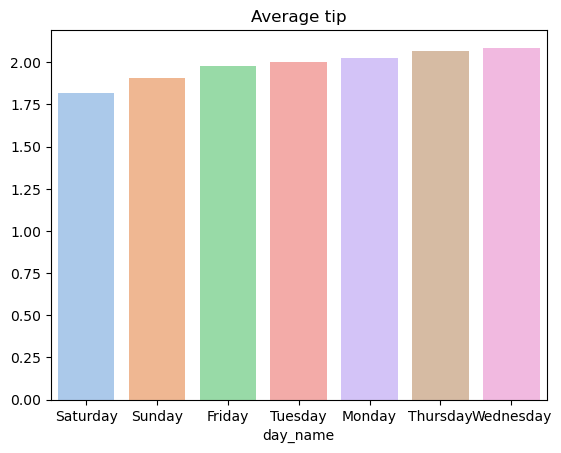

In [127]:
sns.barplot(x = df.groupby(['day_name']).mean(numeric_only=True).sort_values(['tip']).tip.keys(),
           y = df.groupby(['day_name']).mean(numeric_only=True).sort_values(['tip']).tip.values,palette = pastel)
plt.title('Average tip')
plt.show()

In [128]:
#Question 5 : Which pickup zone has the highest number of rides?

In [132]:
#Top 5 pickup zones
df['pickup_zone'].value_counts().head()

Midtown Center                  230
Upper East Side South           211
Penn Station/Madison Sq West    210
Clinton East                    208
Midtown East                    198
Name: pickup_zone, dtype: int64

In [133]:
#Question 6 : Which dropoff zone is the most common destination?

In [135]:
#Top 5 drop off zones
df['dropoff_zone'].value_counts().head()

Upper East Side North    245
Murray Hill              220
Midtown Center           215
Upper East Side South    177
Midtown East             176
Name: dropoff_zone, dtype: int64

In [136]:
#Question 7 : What are the most common pickup and dropoff boroughs?
df['pickup_borough'].value_counts().head()

Manhattan    5288
Queens        657
Brooklyn      388
Bronx          99
Name: pickup_borough, dtype: int64

In [137]:
df['dropoff_borough'].value_counts().head()

Manhattan        5234
Queens            543
Brooklyn          511
Bronx             142
Staten Island       2
Name: dropoff_borough, dtype: int64

In [139]:
#Question 8 : Is there a correlation between distance and fare amount?

In [145]:
print(f"The correlation between distance and fare amount is {df.corr(numeric_only=True)['fare'].loc['distance'] : 0.2f}")

The correlation between distance and fare amount is  0.92


In [146]:
#Question 9 : Average toll paid per ride

In [147]:
df['tolls'].mean()

0.32532338308457703

In [148]:
#Question 10 : What are the peak hours for taxi rides?

In [150]:
df['pickup_hour'] = df['pickup'].dt.hour

In [163]:
df.groupby(['pickup_hour']).count().sort_values(['pickup'],ascending=False)['pickup'].head()

pickup_hour
18    417
19    406
17    388
20    368
14    360
Name: pickup, dtype: int64

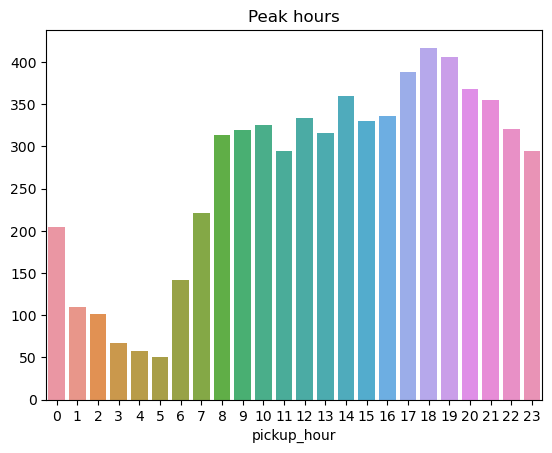

In [165]:
palette = sns.set_palette('rocket_r')
sns.barplot(x = df.groupby(['pickup_hour']).count()['pickup'].keys(),
           y = df.groupby(['pickup_hour']).count()['pickup'].values,palette=palette)
plt.title('Peak hours')
plt.show()

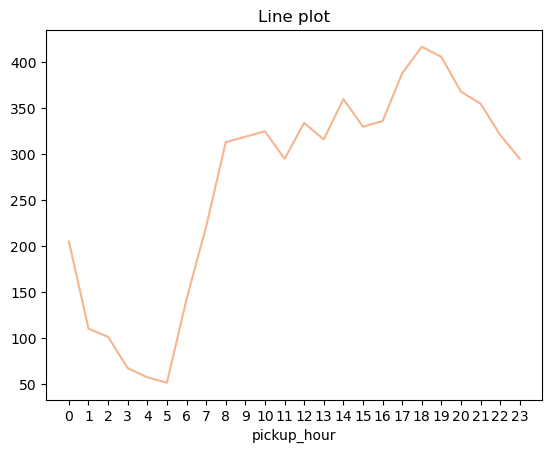

In [171]:
sns.lineplot(x = df.groupby(['pickup_hour']).count().sort_values(['pickup'],ascending=False)['pickup'].keys(),
             y = df.groupby(['pickup_hour']).count().sort_values(['pickup'],ascending=False)['pickup'].values)
plt.xticks(df.groupby(['pickup_hour']).count().sort_values(['pickup'],ascending=False)['pickup'].keys())
plt.title("Line plot")
plt.show()

In [172]:
#Question 11 : How does the total cost vary based on the color of the taxi?

In [173]:
df['color'].value_counts()

yellow    5451
green      981
Name: color, dtype: int64

Text(0.5, 1.0, 'Kde plot')

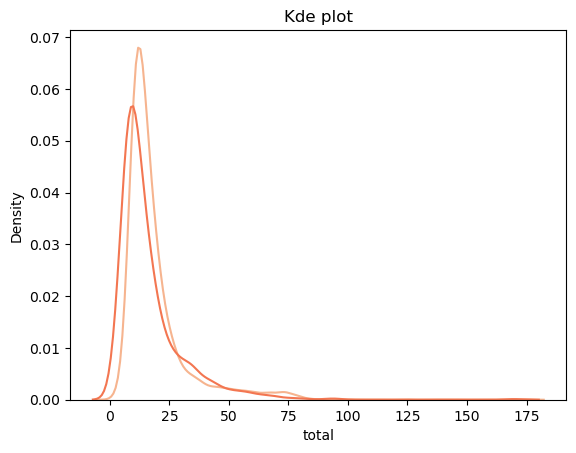

In [177]:
sns.kdeplot(x = df[df['color'] == 'yellow']['total'],label = 'yellow')
sns.kdeplot(x = df[df['color'] == 'green']['total'],label = 'green')
plt.title('Kde plot')

In [178]:
#Question 12 : What are the top tips given for taxi rides?

In [182]:
df.sort_values(['tip'],ascending=False)['tip'].head()

2481    33.20
5946    23.19
5725    20.80
4005    20.65
1567    20.56
Name: tip, dtype: float64

In [183]:
#Question 13 : How does the average fare differ across different pickup and dropoff borough? 

In [189]:
df.groupby(['pickup_borough']).mean(numeric_only=True)['fare']

pickup_borough
Bronx        20.999091
Brooklyn     16.505103
Manhattan    11.213676
Queens       25.006180
Name: fare, dtype: float64

In [190]:
df.groupby(['dropoff_borough']).mean(numeric_only=True)['fare']

dropoff_borough
Bronx            24.691549
Brooklyn         19.275245
Manhattan        11.378745
Queens           20.642118
Staten Island    44.500000
Name: fare, dtype: float64

In [191]:
#Question 14 : What is the average distance traveled for rides paid with different payment methods?

In [194]:
df.groupby(['payment']).mean(numeric_only=True)['distance']

payment
cash           2.540805
credit card    3.220421
Name: distance, dtype: float64

#Question 15 : Is there any seasonality in taxi ride demand? 
There is no enough data to understand the seasonality

Here are some more questions you can explore with the given data:

16. **What is the average trip duration for different pickup and dropoff zones?**
    This can help you understand how travel times vary based on the starting and ending locations.

17. **Is there a difference in the average fare based on the day of the week or month?**
    Analyzing fare variations across different time periods can help you identify trends and seasonality.

18. **What is the most common color of taxis used for rides?**
    This can provide insights into the most popular taxi type.

19. **What is the average total cost per passenger for different payment methods?**
    Understanding the average cost per passenger can be important for pricing strategies.

20. **Are there any outliers in the fare or total cost data that need to be investigated?**
    Identifying outliers can help you understand unusual cases and potential errors in the data.

21. **What is the proportion of cash vs. non-cash payments?**
    This will give you an idea of the prevalence of cash transactions.

22. **Do tips vary based on the distance traveled?**
    Analyzing the relationship between distance and tips can provide insights into customer behavior.

23. **How does the total cost break down into fare, tolls, and tip components?**
    This can help you understand how different factors contribute to the final cost.

24. **Which pickup and dropoff zones have the highest and lowest fares on average?**
    This can provide insights into fare discrepancies across different zones.

25. **What is the overall revenue generated during a specific time period (e.g., a month or a year)?**
    Analyzing revenue can help you understand the financial performance of the taxi service.

26. **What are the most common pickup and dropoff time slots during the day?**
    Understanding peak time slots can help you optimize taxi availability.

27. **What is the average fare per passenger based on the number of passengers in a ride?**
    This can help you understand if there are any fare variations based on group size.

28. **Do different taxi colors have different average trip distances?**
    Analyzing the relationship between taxi color and distance traveled can provide interesting insights.

29. **What are the most popular pickup and dropoff combinations?**
    Identifying popular routes can help you optimize taxi deployment and predict demand.

30. **Is there any difference in the fare for trips within the same borough compared to trips between different boroughs?**
    Understanding fare variations within and between boroughs can be useful for pricing strategies.

These additional questions should further help us explore and understand the data in more detail. Remember that the questions we ask will depend on your specific objectives and what insights you want to gain from the data. Always be curious and open to exploring different angles of the data to make the most out of your analysis.

In [198]:
#What is the average trip duration for different pickup and dropoff zones? 
df['trip_duration'] = (df['dropoff'] - df['pickup'])

In [209]:
df['trip_duration'] = df['trip_duration'].apply(lambda x : str(x).split()[-1])

In [212]:
df['trip_duration'] = pd.to_datetime(df['trip_duration']).dt.time

In [249]:
df['trip_duration_minutes'] = df['trip_duration'].apply(lambda x : int(str(x).split(':')[0])*60 + int(str(x).split(':')[1]) + (float(str(x).split(':')[-1])/60))

In [250]:
df.groupby(['pickup_zone','dropoff_zone']).mean(numeric_only=True).sort_values(['trip_duration_minutes'],ascending=False).head()

,,passengers,distance,fare,tip,tolls,total,pickup_hour,trip_duration_minutes
pickup_zone,dropoff_zone,,,,,,,,
University Heights/Morris Heights,Yorkville East,1.0,22.17,81.86,0.0,0.00,82.36,7.0,107.666667
Sunset Park West,Saint Albans,1.0,25.51,93.50,0.0,0.00,94.80,0.0,93.966667
East Flushing,Little Italy/NoLiTa,2.0,33.46,150.00,0.0,18.90,169.70,14.0,89.883333
Queensbridge/Ravenswood,Flatlands,1.0,12.79,57.00,0.0,0.00,58.80,17.0,88.550000
Lincoln Square West,JFK Airport,0.0,21.10,52.00,0.0,5.76,65.56,17.0,79.000000


In [254]:
#Is there a difference in the average fare based on the day of the week or month?
df.groupby(['day_name']).mean(numeric_only=True)[['fare']]

,fare
day_name,
Friday,13.123677
Monday,13.378644
Saturday,12.486960
Sunday,12.585783
Thursday,13.309602
Tuesday,13.328291
Wednesday,13.552122


In [255]:
#What is the most common color of taxis used for rides?
df['color'].value_counts()

yellow    5451
green      981
Name: color, dtype: int64

In [258]:
#What is the average total cost per passenger for different payment methods?
df.groupby(['passengers','payment']).mean(numeric_only=True)[['total']]

total
passengers payment               
0.0        cash         17.912222
           credit card  19.210128
1.0        cash         14.096214
           credit card  20.028652
2.0        cash         15.500712
           credit card  20.402562
3.0        cash         16.528608
           credit card  21.761524
4.0        cash         14.808667
           credit card  20.654625
5.0        cash         15.646538
           credit card  19.118693
6.0        cash         20.935385
           credit card  19.216930

In [260]:
#From above table,
#we can conclude that there are few instance with zero passengers, this could be a mistake or it is a delivery

Text(0.5, 0.98, 'Outler detection')

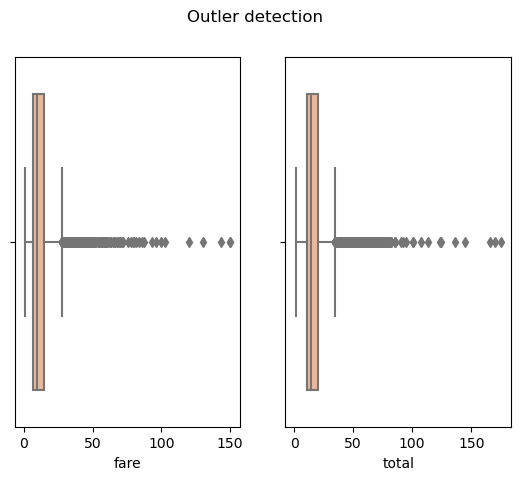

In [267]:
#Are there any outliers in the fare or total cost data that need to be investigated? 
plt.subplot(1,2,1)
sns.boxplot(data = df,x = 'fare')
plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'total')

plt.suptitle('Outler detection')

In [268]:
df['payment'].value_counts()

credit card    4582
cash           1850
Name: payment, dtype: int64

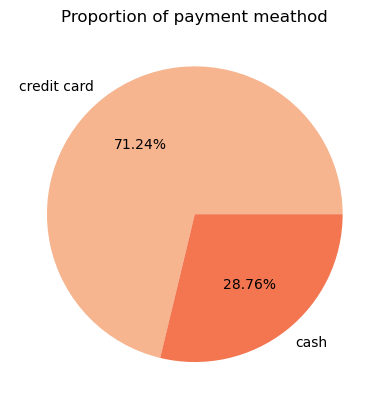

In [270]:
#What is the proportion of cash vs. non-cash payments? 
plt.pie(df['payment'].value_counts(),labels=df['payment'].value_counts().keys(),autopct='%0.2f%%')
plt.title('Proportion of payment meathod')
plt.show()

In [271]:
#Do tips vary based on the distance traveled? 

Text(0.5, 1.0, 'Correaltion between distance and tip')

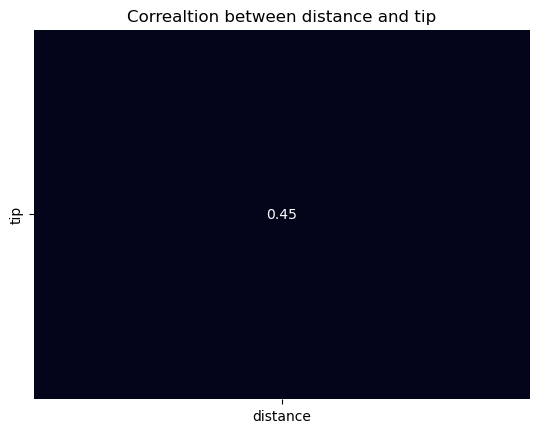

In [281]:
sns.heatmap(df.corr(numeric_only=True)[['distance']].loc[['tip']],cbar=False,annot=True)
plt.title('Correaltion between distance and tip')

<Axes: xlabel='distance', ylabel='tip'>

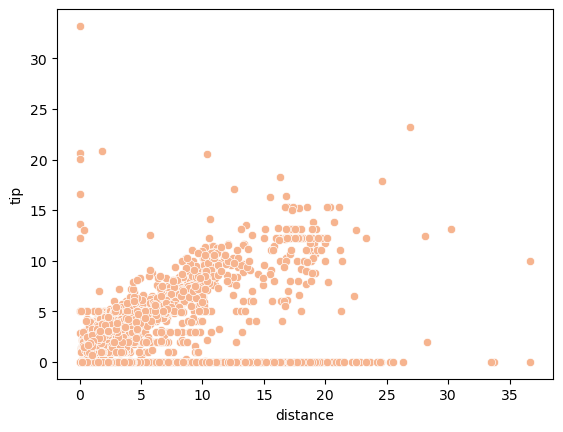

In [282]:
sns.scatterplot(data = df,x = 'distance',y = 'tip')

<Axes: xlabel='distance', ylabel='tip'>

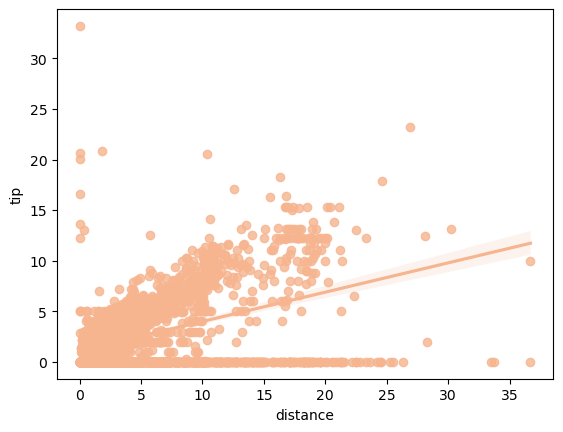

In [283]:
sns.regplot(data = df,x = 'distance',y = 'tip')

In [284]:
#Conclusion : With increase in distance there is increase in tip

In [285]:
#How does the total cost break down into fare, tolls, and tip components? 

In [286]:
df[['fare','tolls','tip','total']]

,fare,tolls,tip,total
1,10.0,0.0,2.00,15.80
2,22.5,0.0,1.00,27.30
3,25.5,0.0,7.30,36.60
4,4.5,0.0,1.00,9.30
5,7.0,0.0,0.00,8.30
...,...,...,...,...
6428,7.5,0.0,0.70,12.00
6429,3.5,0.0,1.45,8.75
6430,4.5,0.0,1.66,9.96
6431,11.5,0.0,3.82,19.12


In [287]:
df['miscellinious'] = df['total'] - (df['fare'] + df['tolls'] + df['tip'])

In [288]:
df[['fare','tolls','tip','total','miscellinious']]

,fare,tolls,tip,total,miscellinious
1,10.0,0.0,2.00,15.80,3.8
2,22.5,0.0,1.00,27.30,3.8
3,25.5,0.0,7.30,36.60,3.8
4,4.5,0.0,1.00,9.30,3.8
5,7.0,0.0,0.00,8.30,1.3
...,...,...,...,...,...
6428,7.5,0.0,0.70,12.00,3.8
6429,3.5,0.0,1.45,8.75,3.8
6430,4.5,0.0,1.66,9.96,3.8
6431,11.5,0.0,3.82,19.12,3.8


In [289]:
df['miscellinious'].value_counts()

3.30    1784
3.80    1090
4.30     608
3.30     366
0.80     298
        ... 
2.80       1
5.75       1
0.80       1
5.75       1
3.55       1
Name: miscellinious, Length: 63, dtype: int64

In [290]:
df['fare_percent'] = (df['fare']/df['total'])*100
df['tolls_percent'] = (df['tolls']/df['total'])*100
df['tip_percent'] = (df['tip']/df['total'])*100
df['miscellinious_percent'] = (df['miscellinious']/df['total'])*100

In [291]:
df['fare_percent']  + df['tolls_percent'] + df['tip_percent'] + df['miscellinious_percent']

1       100.0
2       100.0
3       100.0
4       100.0
5       100.0
        ...  
6428    100.0
6429    100.0
6430    100.0
6431    100.0
6432    100.0
Length: 6432, dtype: float64

In [296]:
df.mean(numeric_only=True).iloc[9:].values.sum()

99.99999999999999

In [297]:
df.mean(numeric_only=True).iloc[9:]

fare_percent             67.358077
tolls_percent             0.613643
tip_percent              10.033214
miscellinious_percent    21.995067
dtype: float64

In [298]:
#Which pickup and dropoff zones have the highest and lowest fares on average?

In [300]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'day_name', 'pickup_hour',
       'trip_duration', 'trip_duration_minutes', 'miscellinious',
       'fare_percent', 'tolls_percent', 'tip_percent',
       'miscellinious_percent'],
      dtype='object')

In [304]:
df.groupby(['pickup_zone']).mean(numeric_only=True).sort_values(['fare'],ascending=True).head(1)


,passengers,distance,fare,tip,tolls,total,pickup_hour,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent
pickup_zone,,,,,,,,,,,,,
Dyker Heights,1.0,0.0,2.5,0.0,0.0,3.3,7.0,0.066667,0.8,75.757576,0.0,0.0,24.242424


In [305]:
df.groupby(['pickup_zone']).mean(numeric_only=True).sort_values(['fare'],ascending=False).head(1)

,passengers,distance,fare,tip,tolls,total,pickup_hour,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent
pickup_zone,,,,,,,,,,,,,
East Flushing,1.5,17.75,80.25,0.0,9.45,90.5,12.5,50.958333,0.8,90.655816,5.568651,0.0,3.775533


In [307]:
df.groupby(['dropoff_zone']).mean(numeric_only=True).sort_values(['fare'],ascending=True).head(1)

,passengers,distance,fare,tip,tolls,total,pickup_hour,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent
dropoff_zone,,,,,,,,,,,,,
East Flushing,1.0,0.89,5.5,0.0,0.0,6.3,12.0,4.716667,0.8,87.301587,0.0,0.0,12.698413


In [308]:
df.groupby(['dropoff_zone']).mean(numeric_only=True).sort_values(['fare'],ascending=False).head(1)

,passengers,distance,fare,tip,tolls,total,pickup_hour,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent
dropoff_zone,,,,,,,,,,,,,
Oakland Gardens,1.5,5.05,66.75,10.325,0.0,77.875,14.5,11.908333,0.8,89.504987,0.0,8.329972,2.165042


In [309]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'day_name', 'pickup_hour',
       'trip_duration', 'trip_duration_minutes', 'miscellinious',
       'fare_percent', 'tolls_percent', 'tip_percent',
       'miscellinious_percent'],
      dtype='object')

In [314]:
#What is the overall revenue generated during a specific time period (e.g., a day)

In [313]:
df['pickup_day'] = df['pickup'].dt.day

In [315]:
df.groupby(['pickup_day']).sum(numeric_only=True)[['fare']]

,fare
pickup_day,
1,2946.97
2,2358.00
3,2187.89
4,2335.74
5,3137.97
6,3269.70
7,2898.64
8,3168.50
9,2741.05


In [316]:
#What are the most common pickup and dropoff time slots during the day? 

In [323]:
df.groupby(df['pickup_hour']).count().sort_values(['pickup'],ascending=False).head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_borough,day_name,trip_duration,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent,pickup_day
pickup_hour,,,,,,,,,,,,,,,,,,,,,
18,417,417,417,417,417,417,417,417,417,417,...,417,417,417,417,417,417,417,417,417,417


In [324]:
df.groupby(df['pickup_hour']).count().sort_values(['pickup'],ascending=True).head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_borough,day_name,trip_duration,trip_duration_minutes,miscellinious,fare_percent,tolls_percent,tip_percent,miscellinious_percent,pickup_day
pickup_hour,,,,,,,,,,,,,,,,,,,,,
5,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


In [325]:
#What is the average fare per passenger based on the number of passengers in a ride?

In [333]:
df['average_fare'] = df['fare']/df['passengers']

In [336]:
#Do different taxi colors have different average trip distances?

In [339]:
df.groupby(['color']).mean(numeric_only=True)[['distance']]

,distance
color,
green,3.409837
yellow,2.955680


In [340]:
#What are the most popular pickup and dropoff combinations?

In [345]:
df.groupby(['pickup_zone','dropoff_zone']).count().sort_values(['pickup'],ascending=False).head(5)[['pickup']]

,,pickup
pickup_zone,dropoff_zone,
Upper East Side North,Upper East Side North,38
Upper East Side South,Upper East Side North,30
Astoria,Astoria,24
Upper East Side North,Upper East Side South,23
Central Harlem,Central Harlem North,20


In [346]:
df.groupby(['pickup_borough','dropoff_borough']).count().sort_values(['pickup'],ascending=False).head(5)[['pickup']]

,,pickup
pickup_borough,dropoff_borough,
Manhattan,Manhattan,4912
Queens,Queens,350
Brooklyn,Brooklyn,289
Queens,Manhattan,229
Manhattan,Queens,163


In [351]:
#Is there any difference in the fare for trips within the same zone compared to trips between different zone? 

In [352]:
df.sort_values(['pickup_zone','dropoff_zone'])[['pickup_zone','dropoff_zone','fare']]

,pickup_zone,dropoff_zone,fare
3119,Allerton/Pelham Gardens,Clinton Hill,54.16
5441,Allerton/Pelham Gardens,Co-Op City,10.50
3034,Alphabet City,East Village,7.00
4014,Alphabet City,Greenwich Village North,10.00
4969,Alphabet City,Greenwich Village South,7.50
...,...,...,...
3412,Yorkville West,Yorkville West,4.50
4545,Yorkville West,Yorkville West,5.50
5274,Yorkville West,Yorkville West,3.50
5795,Yorkville West,Yorkville West,4.00


In [353]:
#Is there any difference in the fare for trips within the same zone compared to trips between different zone? 
#Yes there is!!